In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/zomato.csv


## Import all neccesary libraries for EDA 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
#reading the zomato csv file

df_raw=pd.read_csv("/kaggle/input/zomato/zomato.csv")

df_raw.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### inference-  here url, address, phone,reviews list, menu items does not add any importance to dataset as per the domain understanding 
#### 2) columns likes rate , cost should be of float/int type
#### 3) lets drop the location column as it is same as listed_in(city) feature
#### 4) as per the domain understanding , there should not be duplicate restaurants , so will drop duplicate restaurant names 

In [5]:
#lets drop the columns and change the datatype and column names
df=df_raw.copy()
df.drop(columns=['url','address','phone','reviews_list','menu_item','dish_liked','location'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [6]:
#lets rename the column name to make it more explainatory
df=df.rename(columns={"name":"restaurant_name","rate":"rating","approx_cost(for two people)":"cost_for_two","listed_in(city)":"location"})
df.head(5)

,restaurant_name,online_order,book_table,rating,votes,rest_type,cuisines,cost_for_two,listed_in(type),location
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
#checking if there is any extra spaces in column names and removing it
df.columns= df.columns.str.replace(" ","")
df.head(5)


,restaurant_name,online_order,book_table,rating,votes,rest_type,cuisines,cost_for_two,listed_in(type),location
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
#dropping the duplicates values 
duplicates=df.duplicated()
df.drop_duplicates(inplace=True)
df.head(5)

,restaurant_name,online_order,book_table,rating,votes,rest_type,cuisines,cost_for_two,listed_in(type),location
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## missing value imputation

In [9]:
df['rating'].value_counts()

#here if you see you will find NaN as well as 'NEW' category in rating which is misleading , lets replace New with Nan 
df['rating']=df['rating'].apply(lambda x: np.NaN if x=='NEW' else x)

,index,missing_count,missing_perce
0,restaurant_name,0,0.000000
1,online_order,0,0.000000
2,book_table,0,0.000000
3,rating,9934,19.254550
4,votes,0,0.000000
5,rest_type,227,0.439982
6,cuisines,45,0.087221
7,cost_for_two,344,0.666757
8,listed_in(type),0,0.000000
9,location,0,0.000000


<Axes: >

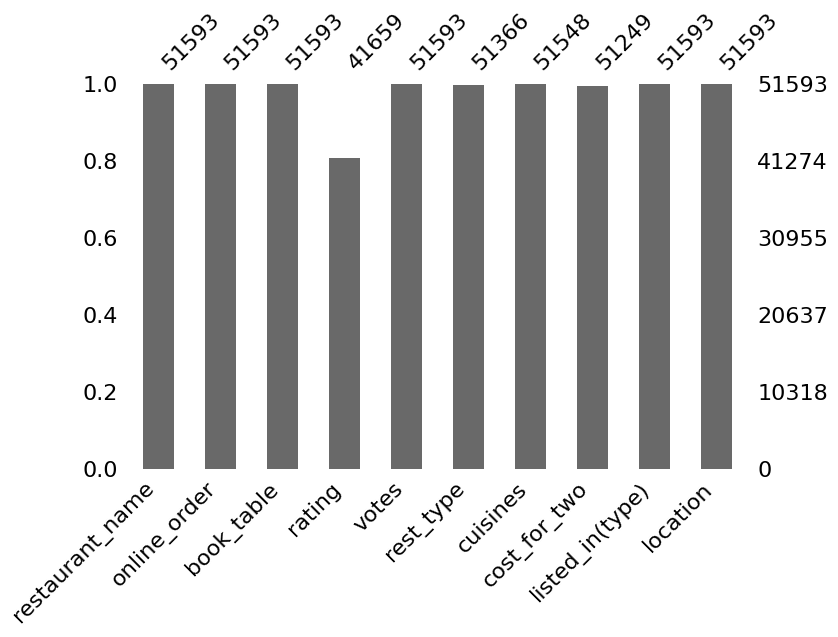

In [10]:
#lets check the missing data and its percentage , percentage will help us take correct decision to impute missing values , shape is (51593,10)
%matplotlib inline
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))
df_missing =df.isna().sum().reset_index(name='missing_count')

df_missing['missing_perce']=(df_missing['missing_count']/df.shape[0])*100
df_missing=df_missing.style.apply(lambda x : [None,None,'background-color:red'] if x['missing_perce']> 0 else [None,None,None],axis=1)
display(df_missing)

import missingno as msno

display(msno.bar(df,figsize=(8,5)))



In [11]:
#generally if missing percentage is more than 10 % we drop the the entire column , however here rating column plays an important feature for analysis so we will impute the missing values, lets drop the rows for nan values 
#are below 5% ie:rest type, cost for two, cuisine

df[df['rating'].isna()].head(5) # there are 9934 rows with rating NAN and they are missing at random, lets check if rating column  has any relation with votes


,restaurant_name,online_order,book_table,rating,votes,rest_type,cuisines,cost_for_two,listed_in(type),location
72,Spicy Tandoor,No,No,NaN,0,Quick Bites,North Indian,150,Delivery,Banashankari
75,Om Sri Vinayaka Chats,No,No,NaN,0,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
84,Chill Out,No,No,NaN,0,Quick Bites,"South Indian, Chinese",100,Delivery,Banashankari
90,Me And My Cake,No,No,NaN,0,Delivery,"Bakery, Desserts",500,Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,"Takeaway, Delivery",South Indian,400,Delivery,Banashankari


In [12]:
#dropping the rows rom below columns 
df.dropna(subset=['rest_type','cost_for_two','cuisines'],inplace=True)

In [13]:
#now only rating columns have nan values which are great in number so lets impute them
df.isna().sum()


restaurant_name       0
online_order          0
book_table            0
rating             9771
votes                 0
rest_type             0
cuisines              0
cost_for_two          0
listed_in(type)       0
location              0
dtype: int64

In [14]:
#lets clean the rating column value and convert the datatype to int
df['rating']=df['rating'].str.split("/").str[0]
df['rating']=pd.to_numeric(df['rating'],errors='coerce')



In [15]:
#lets convert cost_for_two column as integer , will help us to perform arthimatic operations on it 
df['cost_for_two']=df['cost_for_two'].str.replace(",","",regex=True).astype(int)  #there is "," available in couple of value like 1,200 and 1,500

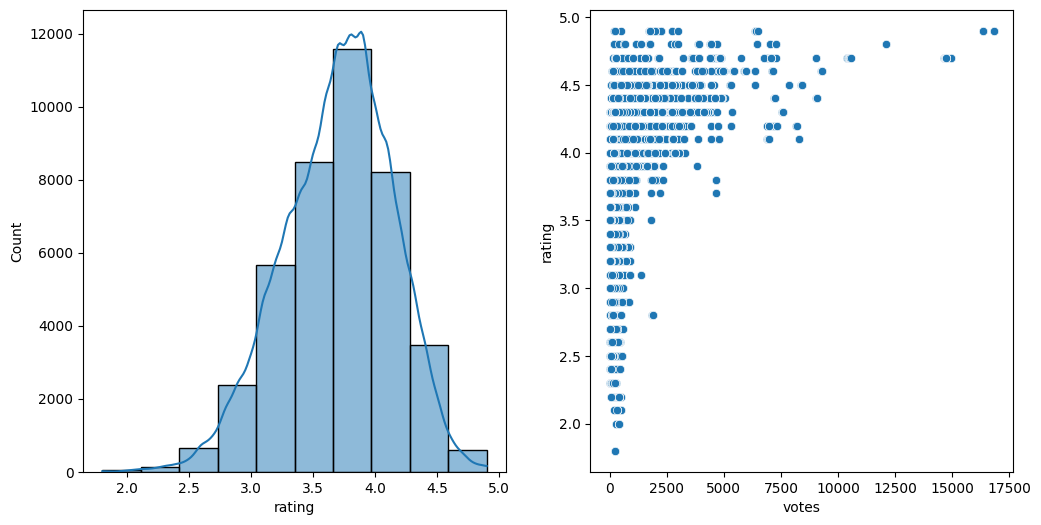

In [16]:
#lets check the relation between rating abd votes so that it could help us to impute the missing values in rating
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,6))
sns.histplot(data=df,x='rating',bins=10,kde=True,ax=ax[0])
sns.scatterplot(data=df,x='votes',y='rating',ax=ax[1])
plt.show()

In [17]:
#lets do the Bi-variate analysis of rating and votes features using pearson correlation method
df1=df[['rating','votes','cost_for_two']]
df1.corr()

,rating,votes,cost_for_two
rating,1.000000,0.434746,0.384481
votes,0.434746,1.000000,0.380843
cost_for_two,0.384481,0.380843,1.000000


#### Inference-  there is no correleation between  rating and votes features so we will use mean method of imputation for rating feature,since it has normal distribution

In [18]:
# missing imputation using mean for rating column
df['rating']=df['rating'].fillna(df['rating'].mean())

### Feature Encoding- lets check the rest_type columns

In [19]:
df.head(20)

,restaurant_name,online_order,book_table,rating,votes,rest_type,cuisines,cost_for_two,listed_in(type),location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [20]:
print(f"total no of unique categories in rest_type are {len(df['rest_type'].unique())}, and general rule is to keep not more than 10 categories.so")


total no of unique categories in rest_type are 93, and general rule is to keep not more than 10 categories.so


In [21]:
#here we will use Top N Encoding method and will select top 9 categories and rest all be embedded into "other" category
top_9_Categories= df['rest_type'].value_counts().nlargest(9).index
df['rest_type']=df['rest_type'].apply(lambda x: x if x in top_9_Categories else 'Other')
df['rest_type'].value_counts()

rest_type
Quick Bites           19008
Casual Dining         10253
Other                  8139
Cafe                   3682
Delivery               2574
Dessert Parlor         2229
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Beverage Shop           863
Name: count, dtype: int64

In [22]:
#lets perform the same Top N encoding for 'cuisines' and 'location' feature
top_9_Categories= df['cuisines'].value_counts().nlargest(9).index
df['cuisines']=df['cuisines'].apply(lambda x: x if x in top_9_Categories else 'Other')
df['cuisines'].value_counts()

cuisines
Other                                  39212
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
Bakery, Desserts                         898
Fast Food                                796
Desserts                                 745
Cafe                                     725
South Indian, North Indian, Chinese      724
Name: count, dtype: int64

In [23]:
top_9_Categories= df['location'].value_counts().nlargest(9).index
df['location']=df['location'].apply(lambda x: x if x in top_9_Categories else 'Other')
df['location'].value_counts()

location
Other                    28726
BTM                       3238
Koramangala 7th Block     2900
Koramangala 5th Block     2797
Koramangala 4th Block     2740
Koramangala 6th Block     2586
Jayanagar                 2350
JP Nagar                  2070
Indiranagar               1834
Church Street             1785
Name: count, dtype: int64

In [24]:
#rest all features are in good shape so lets perform EDA
df.head()

,restaurant_name,online_order,book_table,rating,votes,rest_type,cuisines,cost_for_two,listed_in(type),location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,Other,800,Buffet,Other
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,Other,800,Buffet,Other
2,San Churro Cafe,Yes,No,3.8,918,Other,Other,800,Buffet,Other
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Other,300,Buffet,Other
4,Grand Village,No,No,3.8,166,Casual Dining,Other,600,Buffet,Other


## EDA 

Inference - approx 30000 restaurant deliver food online


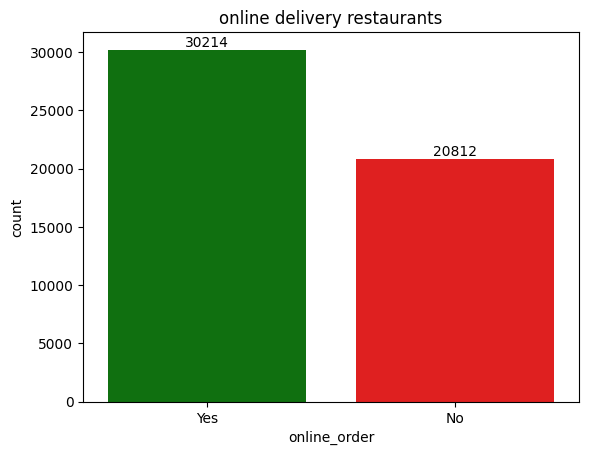

In [25]:
#Restaurants delivering Online or not
ax= sns.countplot(data=df,x='online_order',palette=['green','red'])
ax.bar_label(ax.containers[0])
plt.title("online delivery restaurants")
print(f"Inference - approx 30000 restaurant deliver food online")

Inference - approx 6000 restaurants allows table booking


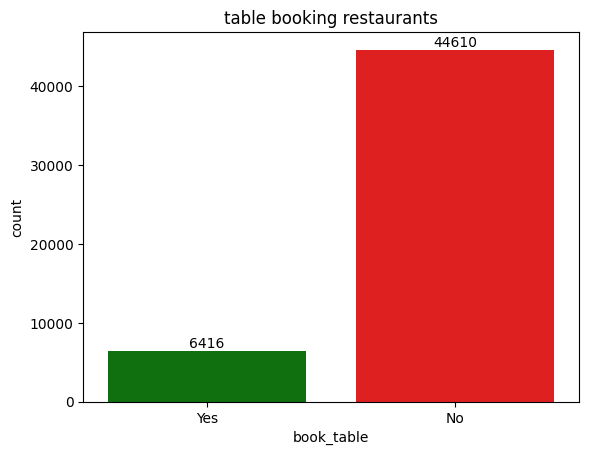

In [26]:
#Restaurants allowing table booking or not

ax1=sns.countplot(data=df,x='book_table',palette=['green','red'])
ax1.bar_label(ax1.containers[0])
plt.title("table booking restaurants")
print(f"Inference - approx 6000 restaurants allows table booking")

Text(0.5, 1.0, 'table booking restaurants')

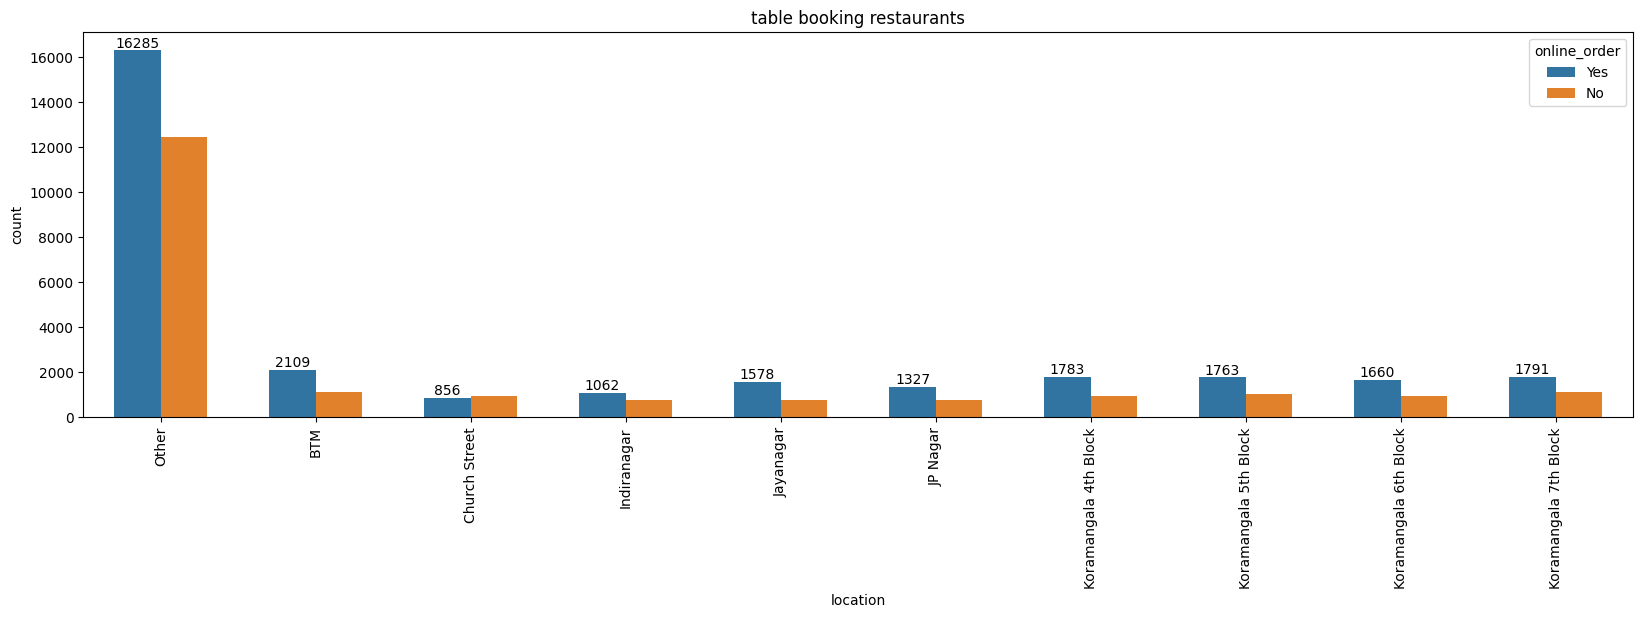

In [27]:
#Best Location
plt.figure(figsize=(20,5))
ax1=sns.countplot(data=df,x='location',width=.6,hue='online_order')
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation=90)
plt.title("table booking restaurants")


Inference - BTM  has highest no of restaurant and also all koramangala blocks as combine have highest no of restaurants and can be consider as best location


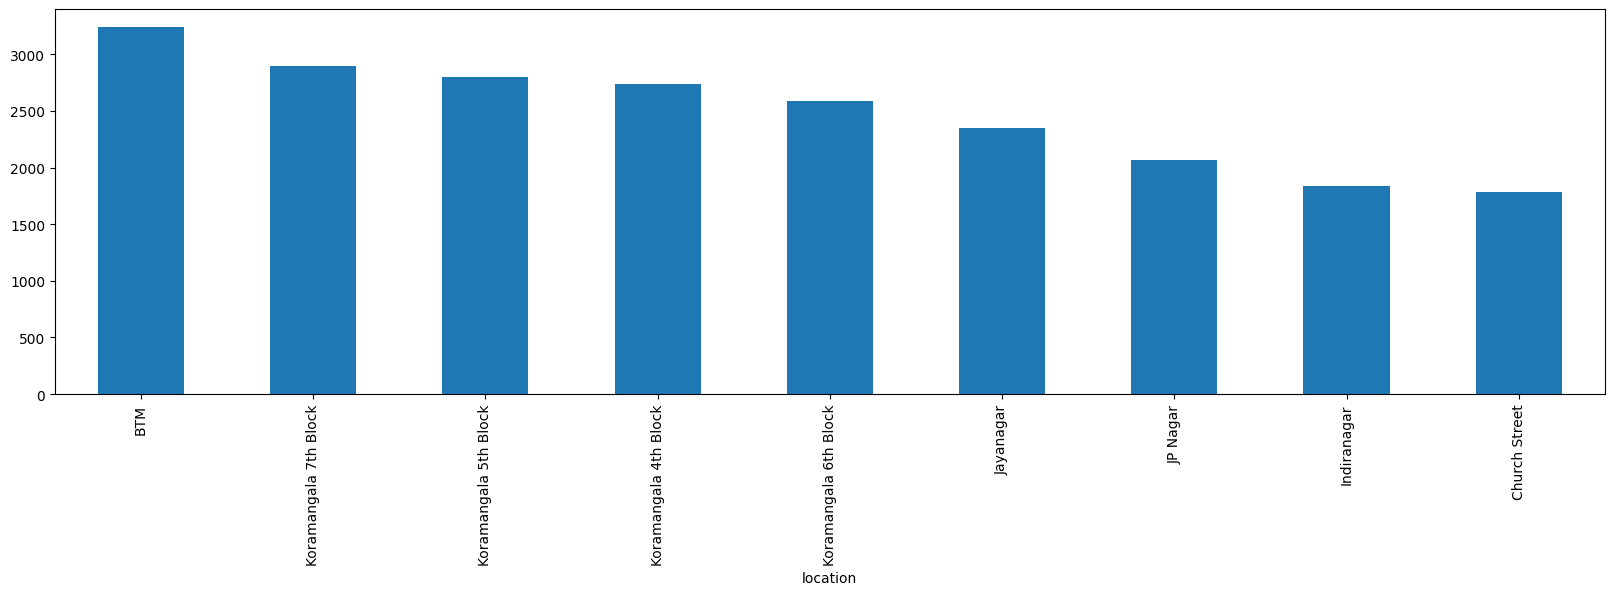

In [28]:
#lcoations without "other" category
plt.figure(figsize=(20,5))
df['location'].value_counts().tail(-1).plot(kind='bar')
print(f"Inference - BTM  has highest no of restaurant and also all koramangala blocks as combine have highest no of restaurants and can be consider as best location")


In [29]:
#Relation between Location and Rating 

#lets find the relation between location(categorial column) and rating(numeric column ) using f_oneway annova from statsmodel api library

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

model=ols('rating ~ C(location)',df).fit()
print(f" p-value is {model.f_pvalue:.8f}")


res= sm.stats.anova_lm(model,typ=2)
res

print(f"rating and location columns are statistically significant since p-value <0.05")

 p-value is 0.00000000
rating and location columns are statistically significant since p-value <0.05


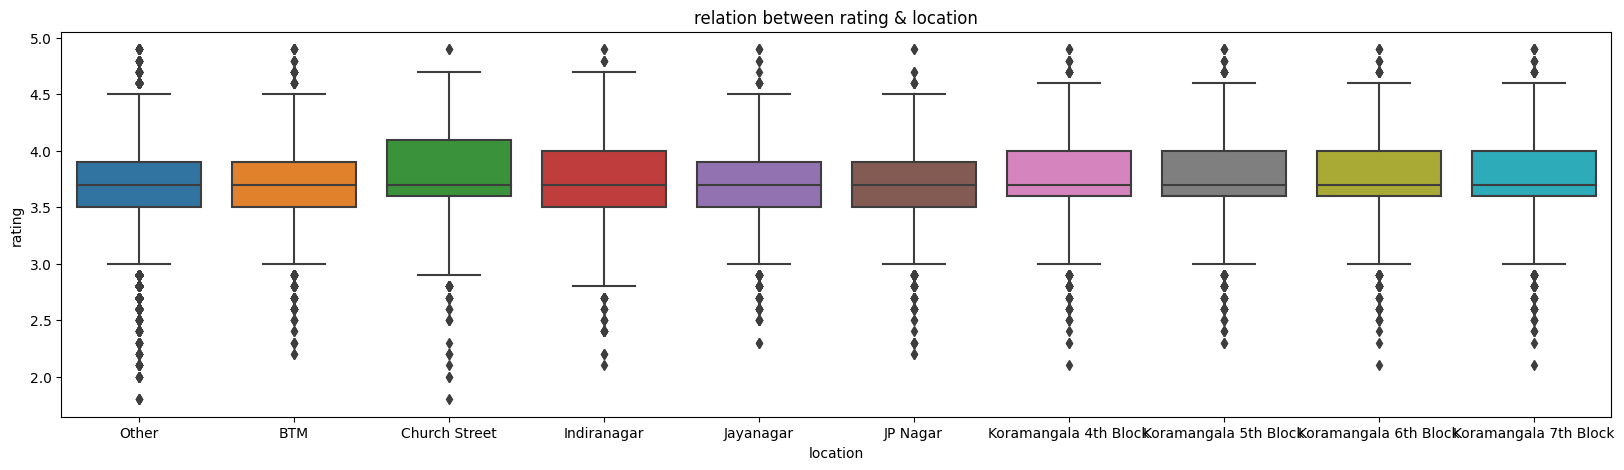

In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='location',y='rating')
plt.title("relation between rating & location")
plt.show()

#### inference - as per box plot between rating & location we conclude , all locations have IQR rating lies betwen 3.5 to 4.0, which most of the restaurants have rating 3.5 to 4


Text(0.5, 0.98, 'restaurant types relation')

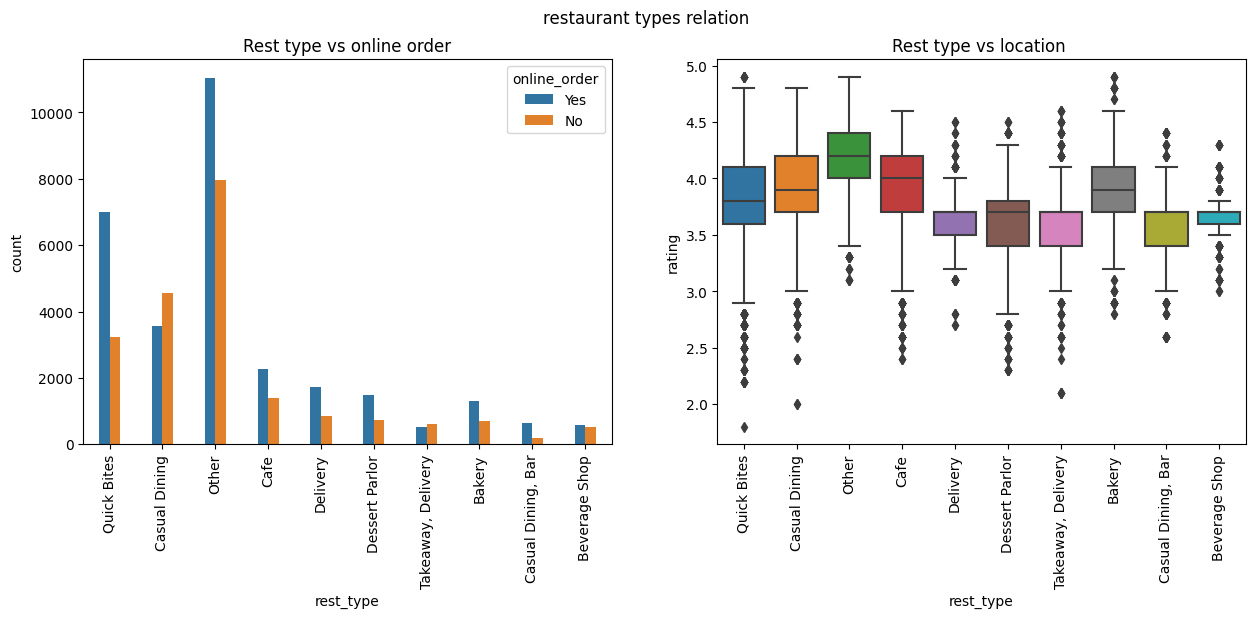

In [31]:
#Restaurant Type
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,x='rest_type',width=.4,hue='online_order',ax=ax[0])
ax[0].set_xticklabels(df['rest_type'].value_counts().index,rotation=90)
ax[0].set_title("Rest type vs online order")

#here in below plot we have excluded the "other" location to analysis the 
sns.boxplot(data=df[df['location'] != 'Other'],x='rest_type',y='rating',ax=ax[1])
ax[1].set_xticklabels(df['rest_type'].value_counts().index,rotation=90)
ax[1].set_title("Rest type vs location ")

fig.suptitle("restaurant types relation")


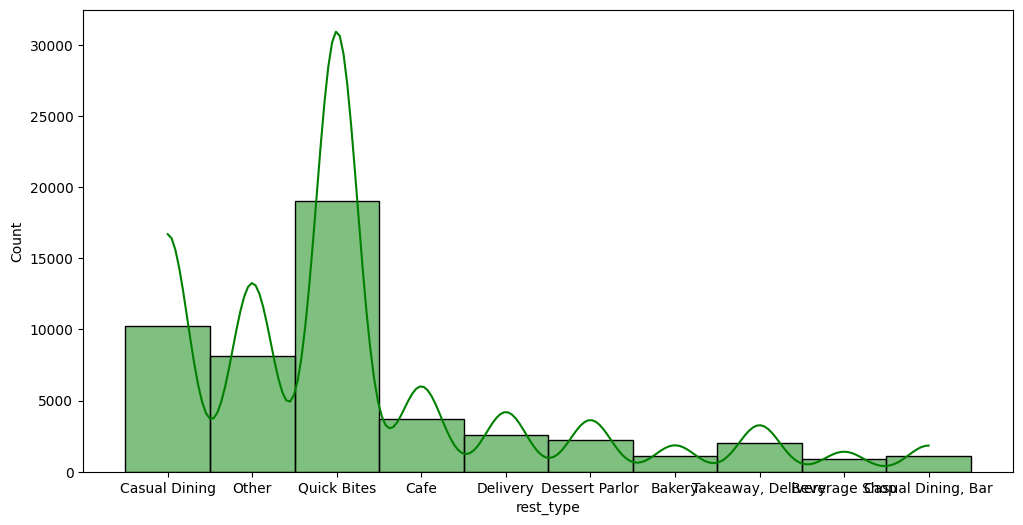

In [32]:
plt.figure(figsize=(12,6))
ax1=sns.histplot(df['rest_type'],kde=True,bins=10,color='green')



### inference 1)  we can conclude that 'qucik bites' restaurant type has highesh in number in bangalore and most online resturants are also quick bites
#### 2) also we can say that , casual dining and cafe's has highest rating 

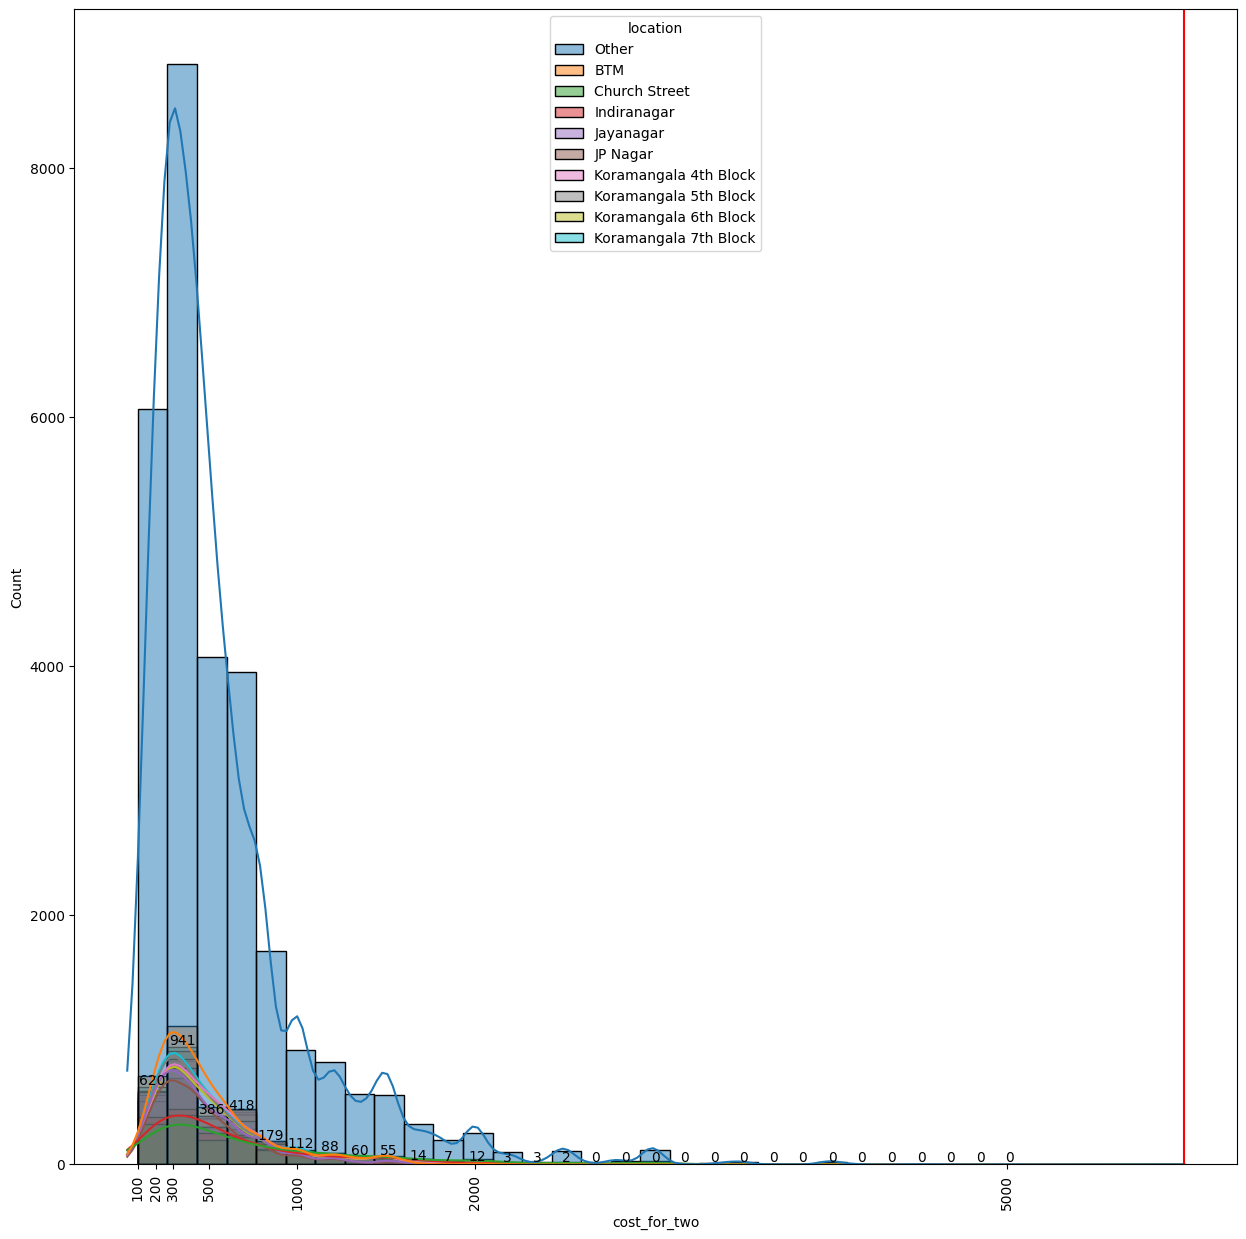

In [33]:
#Cost of Restaurant
plt.figure(figsize=(15,15))
ax=sns.histplot(data=df,x='cost_for_two',bins=30,binrange=range(100,6000,5000),kde=True,hue="location",stat='count')
labels=[100,200,300,500,1000,2000,5000]
#ylabels=range(1,8000,200)
#ax.set_yticks(ylabels)
ax.set_xticks(labels)
ax.set_xticklabels(labels,rotation=90)
ax.axvline(df['cost_for_two'].max(),color='red')
ax.bar_label(ax.containers[0])
plt.show()

### Inference - we can conclude that minimum cost for two is 100 and maximun is more than 5000
### 2) maximum no of hotels have cost for two 300 in bangalore

Text(0.5, 1.0, 'famous restaurant basis restaurant votes')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


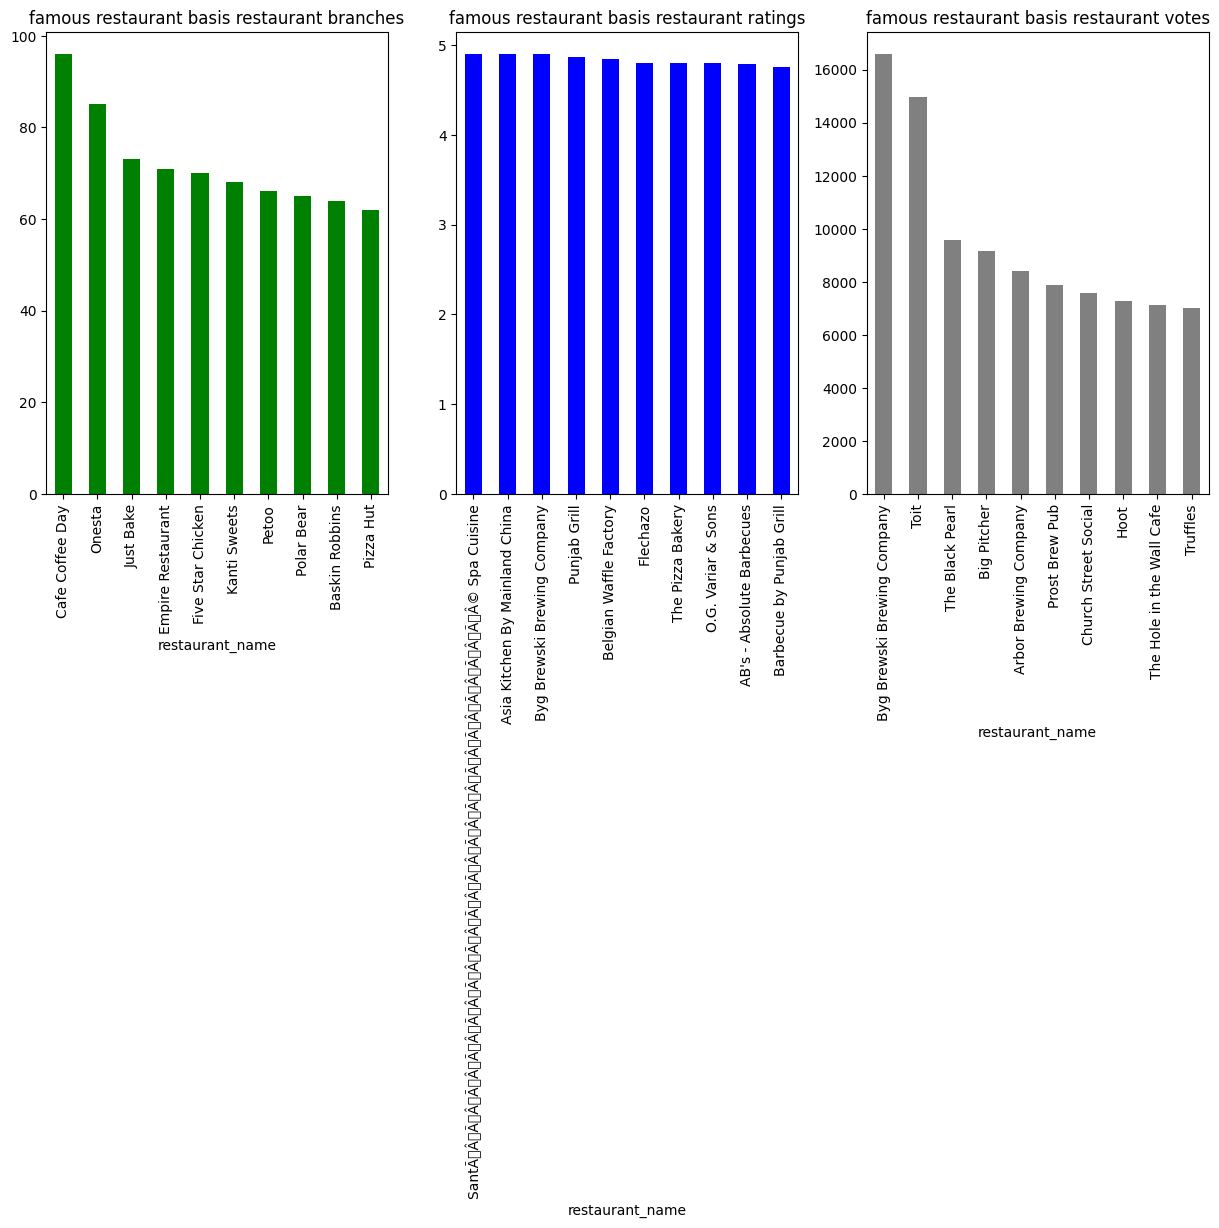

In [34]:
#Most famous restaurant chains in Bengaluru
fig,ax= plt.subplots(1,3,figsize=(15,6))
df['restaurant_name'].value_counts().nlargest(10).plot(kind='bar',ax=ax[0],color='green')
ax[0].set_title("famous restaurant basis restaurant branches")

#top 10 rest vy ratings
grouped= df.groupby('restaurant_name')['rating'].mean()
grouped.sort_values(ascending=False).head(10).plot(kind='bar',ax=ax[1],color='blue')
ax[1].set_title("famous restaurant basis restaurant ratings")

#top 10 famous resturant basis votes received
grouped= df.groupby('restaurant_name')['votes'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color='grey',ax=ax[2])
ax[2].set_title("famous restaurant basis restaurant votes")


### inference-  basis on restaurant branches, we can say coffee cafe day is most popular and based on rating 'spa cuisine'

[Text(0, 0, '3238'),
 Text(0, 0, '1785'),
 Text(0, 0, '1834'),
 Text(0, 0, '2070'),
 Text(0, 0, '2350'),
 Text(0, 0, '2740'),
 Text(0, 0, '2797'),
 Text(0, 0, '2586'),
 Text(0, 0, '2900'),
 Text(0, 0, '28726')]

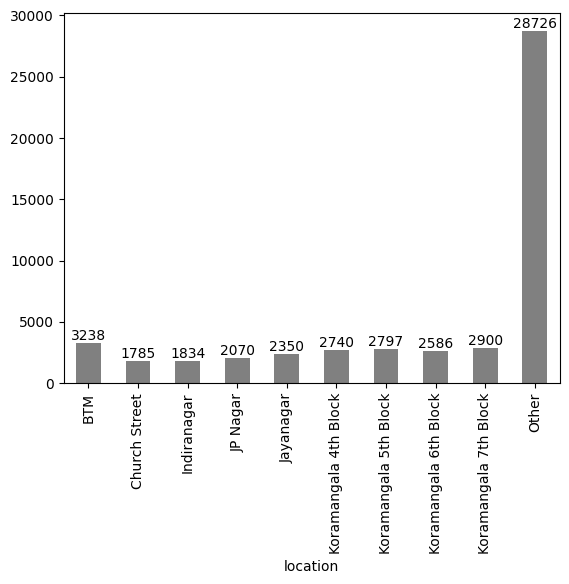

In [35]:
#No. of restaurants in a Location

ax= df.groupby("location")['restaurant_name'].count().plot(kind='bar',color='grey')
ax.bar_label(ax.containers[0])

### Inference - no of restaurants based on location